In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from skfeature.function.similarity_based import fisher_score
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

Feature: YVector Score: 0.266667690589407
Feature: velocity Score: 0.254868702327669
Feature: invVelocity Score: 0.24668804928243393
Feature: stepIndex Score: 0.24374066124965488
Feature: P Score: 0.20548438775871958
Feature: SKImage-y0 Score: 0.1947578080668766
Feature: HoughTransform-y0 Score: 0.18527837785694157
Feature: SKImage-b Score: 0.18394631571907105
Feature: SKImage-eqDiameter Score: 0.1814681483069469
Feature: MPArea Score: 0.1809497406212115
Feature: distanceToBoundary Score: 0.17164284729870882
Feature: boundary Score: 0.17009710616589668
Feature: HoughTransform-fitness Score: 0.1635866294908448
Feature: HoughTransform-a Score: 0.16179248564746196
Feature: XUnitVector Score: 0.1494658849263235
Feature: SKImage-a Score: 0.14932918402524464
Feature: YUnitVector Score: 0.14819029142332507
Feature: XVector Score: 0.14780105468365257
Feature: SKImage-angle Score: 0.12748020017835948
Feature: SKImage-x0 Score: 0.1250271449828695
Feature: y Score: 0.10996324443707639
Feature: x 

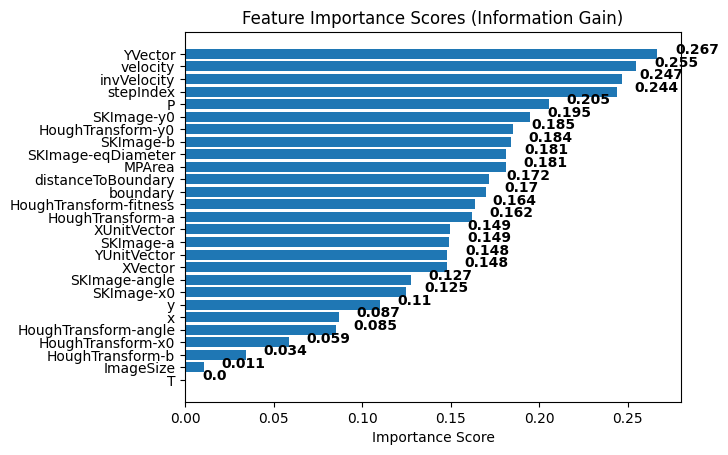

In [37]:
df = pd.read_csv('L0001.csv')

#Fill NaN values with 0's
df.fillna(0, inplace=True, axis=1)

#split dataset into features and target
X = df.iloc[:, 0:27]
y = df.iloc[:, 27]

ig = mutual_info_regression(X, y)

feature_scores = {}
for i in range(len(X.columns)):
    feature_scores[X.columns[i]] = ig[i]

#sort in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

#print values
for feature, score in sorted_features:
    print("Feature:", feature, "Score:", score)

#plot
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

#add scores
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")

plt.show()

In [15]:
#df['target'] = df['MPArea']
#Trying best to get closest to the MP Area value

In [16]:
'''
column_headers = df.columns

# Convert to a 1D array (NumPy array)
column_headers_array = np.array(column_headers)

# Print the result
print("Column Headers as a list:", column_headers.tolist())
'''



print(X.shape)  # Should return (number of samples, number of features)
print(y.shape)  # Should return (number of samples,)

(23684, 27)
(23684,)


In [17]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

def forward_selection(X, y, significance_level=0.05):
    
    
    initial_features = []
    best_features = []
    remaining_features = list(X.columns)
    while remaining_features:
        p_values = []
        for feature in remaining_features:
            features = initial_features + [feature]
            X_train = sm.add_constant(X[features])  # add constant term
            model = sm.OLS(y, X_train).fit()
            p_values.append(model.pvalues[feature])
        
        best_p_value = min(p_values)
        if best_p_value < significance_level:
            best_feature = remaining_features[p_values.index(best_p_value)]
            best_features.append(best_feature)
            initial_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break

    return best_features

#WHAT DOES THIS FUNCTION DO?

'''

CHATGPT Response:

Purpose:
The function selects features for a linear regression model based on their p-values, using forward selection. 
This method involves starting with no features and progressively adding features that improve the model 
until no additional features meet the specified significance level.

*CHATGPT Explains code line by line*

Summary
In essence, forward_selection helps identify a subset of features from a larger set that are statistically 
significant for predicting the target variable. It does so by iteratively adding features that improve the model's 
performance based on their p-values until no additional features meet the desired significance level.

'''

"\n\nCHATGPT Response:\n\nPurpose:\nThe function selects features for a linear regression model based on their p-values, using forward selection. \nThis method involves starting with no features and progressively adding features that improve the model \nuntil no additional features meet the specified significance level.\n\n*CHATGPT Explains code line by line*\n\nSummary\nIn essence, forward_selection helps identify a subset of features from a larger set that are statistically \nsignificant for predicting the target variable. It does so by iteratively adding features that improve the model's \nperformance based on their p-values until no additional features meet the desired significance level.\n\n"

In [18]:
forward_selection(df, df['SKImage-a'], 0.05)

['P',
 'MPArea',
 'x',
 'y',
 'T',
 'ImageSize',
 'SKImage-eqDiameter',
 'SKImage-a',
 'stepIndex']

In [19]:
import pandas as pd
import statsmodels.api as sm

def backward_elimination(X, y, significance_level=0.05):

    features = list(X.columns)
    
    while features:
        X_train = sm.add_constant(X[features])  # add constant term
        model = sm.OLS(y, X_train).fit()
        p_values = model.pvalues[1:]  # exclude the constant term
        
        #get feature with highest p value
        max_p_value = p_values.max()
        
        if max_p_value > significance_level:
            #remove feature with highest p value
            feature_to_remove = p_values.idxmax()
            features.remove(feature_to_remove)
        else:
            break

    return features

#WHAT DOES THIS FUNCTION DO?

'''

Purpose:
The function is designed to select features for a linear regression model by iteratively removing features with the highest p-values, 
until all remaining features have p-values below a specified significance level.

*CHATGPT Explains code line by line*

Summary
In essence, backward_elimination helps to identify a subset of features that are statistically significant for predicting the target variable. 
It does this by iteratively removing the least significant feature (the one with the highest p-value)
until all remaining features have p-values below the specified significance level. 
This process helps simplify the model by eliminating features that do not contribute significantly to the model's explanatory power.

'''

"\n\nPurpose:\nThe function is designed to select features for a linear regression model by iteratively removing features with the highest p-values, \nuntil all remaining features have p-values below a specified significance level.\n\n*CHATGPT Explains code line by line*\n\nSummary\nIn essence, backward_elimination helps to identify a subset of features that are statistically significant for predicting the target variable. \nIt does this by iteratively removing the least significant feature (the one with the highest p-value)\nuntil all remaining features have p-values below the specified significance level. \nThis process helps simplify the model by eliminating features that do not contribute significantly to the model's explanatory power.\n\n"

In [20]:
backward_elimination(df, df['MPArea'], 0.05)

['y', 'stepIndex', 'MPArea']

In [21]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def rfe(X, y, num_features=None):
 
    model = LinearRegression()

    #initialize rfe
    rfe = RFE(estimator=model, n_features_to_select=num_features, step=1)
    
    #fit data
    rfe = rfe.fit(X, y)
    
    selected_indices = rfe.support_
    
    selected_features = X.columns[selected_indices].tolist()
    
    return selected_features

#WHAT DOES THIS FUNCTION DO?

'''

Purpose:
The function uses RFE to select a subset of features from the dataset that are most relevant for predicting the target variable. 
RFE is a technique that recursively removes the 
least important features based on the performance of a given estimator (in this case, a linear regression model).

*CHATGPT Explains code line by line*

Summary
In summary, the rfe function performs feature selection by applying Recursive Feature Elimination (RFE) with a linear regression model. 
It iteratively removes the least important features and selects a specified number of the most important features. 
If num_features is specified, it will return exactly that number of features. 
If num_features is not specified, it defaults to returning a list of all features ranked by their importance.

'''

'\n\nPurpose:\nThe function uses RFE to select a subset of features from the dataset that are most relevant for predicting the target variable. \nRFE is a technique that recursively removes the \nleast important features based on the performance of a given estimator (in this case, a linear regression model).\n\n*CHATGPT Explains code line by line*\n\nSummary\nIn summary, the rfe function performs feature selection by applying Recursive Feature Elimination (RFE) with a linear regression model. \nIt iteratively removes the least important features and selects a specified number of the most important features. \nIf num_features is specified, it will return exactly that number of features. \nIf num_features is not specified, it defaults to returning a list of all features ranked by their importance.\n\n'

In [22]:
rfe(df, df['SKImage-a'], 9)

['P',
 'XVector',
 'YVector',
 'SKImage-eqDiameter',
 'SKImage-a',
 'velocity',
 'XUnitVector',
 'invVelocity',
 'powerDensity']

In [40]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

def randForest(X, y):
    
    
    if not isinstance(X, pd.DataFrame) or not isinstance(y, pd.Series):
        raise ValueError("X should be a pandas DataFrame and y should be a pandas Series")
    
    #random forest regressor
    model = RandomForestRegressor()
    
    #fit model
    model.fit(X, y)
    
    importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    correlation = X.corrwith(y).abs().sort_values(ascending=False)
    
    #put info into a df
    importance_df = pd.DataFrame({'Correlation': correlation, 'Importance': importance}).fillna(0) 
    
    #sort
    importance_df['Combined'] = importance_df['Correlation'] + importance_df['Importance']
    importance_df = importance_df.sort_values(by='Correlation', ascending=False)
    
    return importance_df

#IMPORTANCE
# Refers to the degree of usefulness of each input feature in a models decision making process 
    
#remove when mparea is 0
    #run 1 normal and 1 with  no 0's
    #drop columns that arent important houghtrans, skimages (not a), boundary
    #compare skiimage-a to hough-a, generate a plot

    #train model based on feature selection
df = df[df['HoughTransform-a'] > 0]
#skimage-a remove 0's
df.head()

,x,y,P,stepIndex,XVector,YVector,ImageSize,HoughTransform-a,boundary,distanceToBoundary,velocity,XUnitVector,YUnitVector,invVelocity,powerDensity
1,-5.91,16.0,100.0,7760.0,0.009,0.0,14400.0,6.519202,1.0,0.0,0.009,1.0,0.0,111.111111,11111.111111
2,-5.82,16.0,100.0,7770.0,0.009,0.0,14400.0,8.000000,1.0,0.0,0.009,1.0,0.0,111.111111,11111.111111
3,-5.73,16.0,100.0,7780.0,0.009,0.0,14400.0,9.124144,1.0,0.0,0.009,1.0,0.0,111.111111,11111.111111
4,-5.64,16.0,100.0,7790.0,0.009,0.0,14400.0,10.000000,1.0,0.0,0.009,1.0,0.0,111.111111,11111.111111
5,-5.55,16.0,100.0,7800.0,0.009,0.0,14400.0,8.139410,1.0,0.0,0.009,1.0,0.0,111.111111,11111.111111


In [38]:
df.drop(columns=['T'], inplace=True)
#df.drop(columns=['HoughTransform-a'], inplace=True)
df.drop(columns=['HoughTransform-b'], inplace=True)
df.drop(columns=['HoughTransform-fitness'], inplace=True)
df.drop(columns=['HoughTransform-angle'], inplace=True)
df.drop(columns=['HoughTransform-x0'], inplace=True)
df.drop(columns=['HoughTransform-y0'], inplace=True)
df.drop(columns=['SKImage-a'], inplace=True)
df.drop(columns=['SKImage-b'], inplace=True)
df.drop(columns=['SKImage-eqDiameter'], inplace=True)
df.drop(columns=['SKImage-angle'], inplace=True)
df.drop(columns=['SKImage-x0'], inplace=True)
df.drop(columns=['SKImage-y0'], inplace=True)
df.drop(columns=['MPArea'], inplace=True)

In [41]:
df.head()

,x,y,P,stepIndex,XVector,YVector,ImageSize,HoughTransform-a,boundary,distanceToBoundary,velocity,XUnitVector,YUnitVector,invVelocity,powerDensity
1,-5.91,16.0,100.0,7760.0,0.009,0.0,14400.0,6.519202,1.0,0.0,0.009,1.0,0.0,111.111111,11111.111111
2,-5.82,16.0,100.0,7770.0,0.009,0.0,14400.0,8.000000,1.0,0.0,0.009,1.0,0.0,111.111111,11111.111111
3,-5.73,16.0,100.0,7780.0,0.009,0.0,14400.0,9.124144,1.0,0.0,0.009,1.0,0.0,111.111111,11111.111111
4,-5.64,16.0,100.0,7790.0,0.009,0.0,14400.0,10.000000,1.0,0.0,0.009,1.0,0.0,111.111111,11111.111111
5,-5.55,16.0,100.0,7800.0,0.009,0.0,14400.0,8.139410,1.0,0.0,0.009,1.0,0.0,111.111111,11111.111111


In [42]:
randForest(df, df['HoughTransform-a']) #drop some columns and keep control variables

C:\Users\aka\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\aka\AppData\Local\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Correlation,Importance,Combined
HoughTransform-a,1.000000,9.997776e-01,1.999778
P,0.548208,3.846868e-08,0.548209
boundary,0.548208,2.178682e-08,0.548208
powerDensity,0.548206,3.521872e-07,0.548206
invVelocity,0.548179,5.191506e-07,0.548180
velocity,0.548175,2.429429e-07,0.548176
distanceToBoundary,0.406407,3.079378e-05,0.406438
stepIndex,0.244029,1.237077e-04,0.244152
y,0.196226,2.358810e-05,0.196250
x,0.136080,2.583992e-05,0.136105
